In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import mlUtils as ml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("dataTestwithout0.csv")

In [3]:
df.head()

,make,model,derivative,year,price,fuelType,mileage,sellerType,transmission,engineSize,color,manufacturerColor,condition,owners,taxBandCode
0,Mercedes-Benz,E Class,E 300De AMG Line Plus *MULTISPOKE ALLOYS*NIGHT...,2026,89900,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Black,Black,new,NaN,NaN
1,Mercedes-Benz,E Class,E 300De AMG Line Plus *MULTISPOKE ALLOYS*,2026,89500,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Black,Black,new,NaN,NaN
2,Mercedes-Benz,E Class,E 300De AMG Line *MULTISPOKE ALLOYS*NIGHT PACK...,2026,89500,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Silver,Silver,new,NaN,NaN
3,Mercedes-Benz,E Class,E 300De AMG Line Plus *Hyperscreen* 360 Camera...,2026,89495,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Black,Black,new,NaN,NaN
4,Mercedes-Benz,E Class,E 300 e AMG EDITION PLUS,2026,89367,Petrol Plug-in Hybrid,14,ContactTrade,Automatic,2.0,Grey,Graphite Grey Metallic,new,NaN,NaN


In [4]:
# inputs
features = df[["make", "model", "year", "mileage", "fuelType", "engineSize"]]
x = df["mileage"]
# output/target
y = df["price"]

0           0
1           0
2           0
3           0
4          14
        ...  
322    204850
323    122132
324    138047
325    140000
326    219998
Name: mileage, Length: 327, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,     # 20% test set
    random_state=42,   # ensures reproducible results
    shuffle=True
)

183    12998
17         0
24         0
132        9
113        8
       ...  
188    29499
71         0
106        0
270    81083
102        9
Name: mileage, Length: 261, dtype: int64


In [6]:
# Add +1 to avoid log(0)
x_log = np.log(X_train + 1)

# Standardize
mean = x_log.mean()
std = x_log.std()

x_log_norm = (x_log - mean) / std

In [7]:
w_final, b_final, J_hist, p_hist = ml.train(x_log_norm ,y_train)

Iteration    0: Cost 2.20e+09  dj_dw:  1.933e+04, dj_db: -6.979e+04   w: -1.933e+03, b: 6.97859e+03
Iteration  100: Cost 7.89e+07  dj_dw:  5.357e-01, dj_db: -1.854e+00   w: -1.940e+04, b: 6.97842e+04
Iteration  200: Cost 7.89e+07  dj_dw:  1.485e-05, dj_db: -4.923e-05   w: -1.940e+04, b: 6.97859e+04
Iteration  300: Cost 7.89e+07  dj_dw:  4.103e-10, dj_db: -1.310e-09   w: -1.940e+04, b: 6.97859e+04
Iteration  400: Cost 7.89e+07  dj_dw:  1.707e-11, dj_db: -7.125e-11   w: -1.940e+04, b: 6.97859e+04
Iteration  500: Cost 7.89e+07  dj_dw:  1.707e-11, dj_db: -7.125e-11   w: -1.940e+04, b: 6.97859e+04
Iteration  600: Cost 7.89e+07  dj_dw:  1.707e-11, dj_db: -7.125e-11   w: -1.940e+04, b: 6.97859e+04
Iteration  700: Cost 7.89e+07  dj_dw:  1.707e-11, dj_db: -7.125e-11   w: -1.940e+04, b: 6.97859e+04
Iteration  800: Cost 7.89e+07  dj_dw:  1.707e-11, dj_db: -7.125e-11   w: -1.940e+04, b: 6.97859e+04
Iteration  900: Cost 7.89e+07  dj_dw:  1.707e-11, dj_db: -7.125e-11   w: -1.940e+04, b: 6.97859e+04


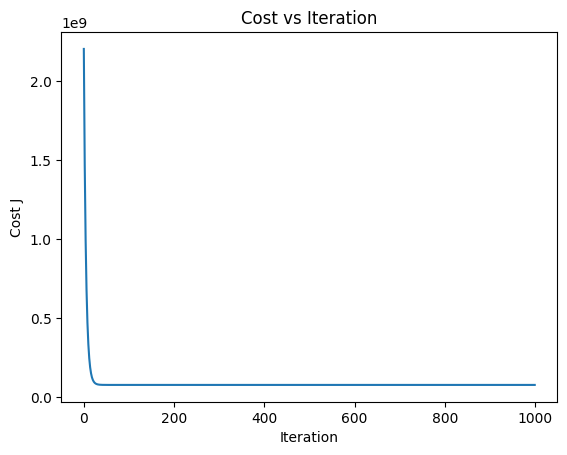

In [8]:
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Cost vs Iteration")
plt.show()

-19402.654180814243 69785.90038314169


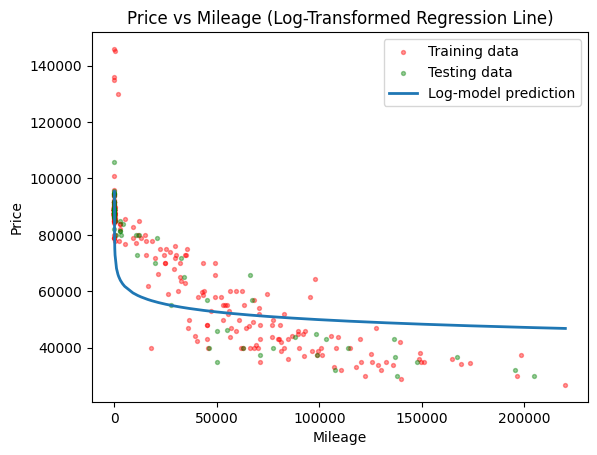

In [9]:
# Sort original mileage so the line draws correctly
x_log = np.log(x + 1)
x_log_mean = x_log.mean()
x_log_std = x_log.std()
x_sorted = np.sort(x)

# Apply SAME LOG + NORMALIZATION as training
x_sorted_log = np.log(x_sorted + 1)
x_sorted_norm = (x_sorted_log - x_log_mean) / x_log_std

print(w_final, b_final)
# Model predictions using learned w and b
y_pred_line = w_final * x_sorted_norm + b_final

# Plot actual training points
plt.scatter(X_train, y_train, alpha=0.4, label="Training data", s=8, color="red")
plt.scatter(X_test, y_test, alpha=0.4, label="Testing data", s=8, color="green")


# Plot prediction line
plt.plot(x_sorted, y_pred_line, linewidth=2, label="Log-model prediction")

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs Mileage (Log-Transformed Regression Line)")
plt.legend()
plt.show()

In [11]:
w_raw = w_final / std
b_raw = b_final - (w_final * mean / std)

print(w_raw, b_raw)

y_pred = w_raw * np.log(X_test + 1) + b_raw
print(y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

-3942.75984831502 95439.46211054592
231    53175.682807
110    95439.462111
250    48816.807488
9      95439.462111
93     86360.922059
           ...     
248    50553.825991
60     55125.635175
124    83628.009186
261    52403.817887
172    64591.127648
Name: mileage, Length: 66, dtype: float64
RMSE: 130534243.97980432
R²: 0.7487616609208041


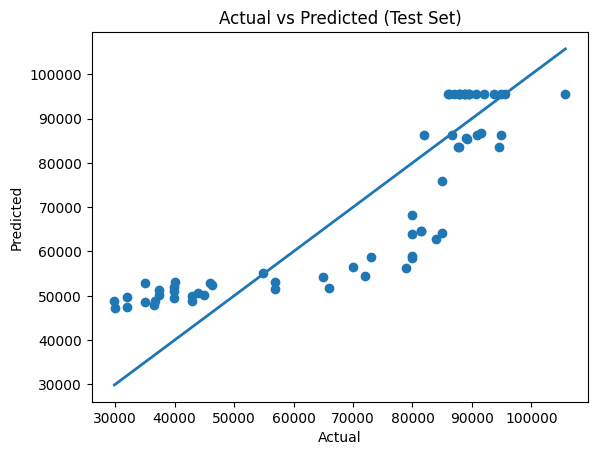

In [12]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linewidth=2)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.show()